In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the dataset
def load_data():
    path_0 = 'https://raw.githubusercontent.com/mumer97/Stats/main/digit0'
    path_1 = 'https://raw.githubusercontent.com/mumer97/Stats/main/digit1'
    path_2 = 'https://raw.githubusercontent.com/mumer97/Stats/main/digit2'

    df_0 = pd.read_csv(path_0, header=None)
    df_1 = pd.read_csv(path_1, header=None)
    df_2 = pd.read_csv(path_2, header=None)

    X = pd.concat([df_0, df_1, df_2])
    y = np.concatenate([np.zeros(len(df_0)), np.ones(len(df_1)), np.full(len(df_2), 2)])

    X = X.values / 255.0  # Normalize the input data
    return X, y

def preprocess_data(X, y):
    X = X.reshape(-1, 16, 16, 1)  # Reshape the input data to a 16x16 format
    y = tf.keras.utils.to_categorical(y, num_classes=3)  # One-hot encode the labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

X, y = load_data()
X_train, X_test, y_train, y_test = preprocess_data(X, y)

# Create the neural network models for Net-1 and Net-2
def create_net1():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(16, 16, 1)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_net2():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(16, 16, 1)),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Fit the neural network models to the training data
net1 = create_net1()
net1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

net2 = create_net2()
net2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the neural network models on the test data
net1_score = net1.evaluate(X_test, y_test)
print("Net-1 Test Accuracy: ", net1_score[1])

net2_score = net2.evaluate(X_test, y_test)
print("Net-2 Test Accuracy: ", net2_score[1])

# Fit logistic regression to the training data and evaluate on the test data
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.reshape(-1, 256), np.argmax(y_train, axis=1))
y_pred = logistic_regression.predict(X_test.reshape(-1, 256))

print("Logistic Regression Test Accuracy: ", logistic_regression.score(X_test.reshape(-1, 256), np.argmax(y_test, axis=1)))

# Print the classification report
print("Classification report for Logistic Regression:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))

Epoch 1/10
58/58 [==============================] - 1s 5ms/step - loss: 1.0885 - accuracy: 0.5480 - val_loss: 1.0786 - val_accuracy: 0.7379
Epoch 2/10
58/58 [==============================] - 0s 2ms/step - loss: 1.0664 - accuracy: 0.7469 - val_loss: 1.0595 - val_accuracy: 0.7379
Epoch 3/10
58/58 [==============================] - 0s 3ms/step - loss: 1.0465 - accuracy: 0.7512 - val_loss: 1.0421 - val_accuracy: 0.7379
Epoch 4/10
58/58 [==============================] - 0s 2ms/step - loss: 1.0280 - accuracy: 0.7507 - val_loss: 1.0259 - val_accuracy: 0.7379
Epoch 5/10
58/58 [==============================] - 0s 2ms/step - loss: 1.0110 - accuracy: 0.7485 - val_loss: 1.0104 - val_accuracy: 0.7379
Epoch 6/10
58/58 [==============================] - 0s 2ms/step - loss: 0.9948 - accuracy: 0.7512 - val_loss: 0.9958 - val_accuracy: 0.7379
Epoch 7/10
58/58 [==============================] - 0s 4ms/step - loss: 0.9793 - accuracy: 0.7507 - val_loss: 0.9813 - val_accuracy: 0.7379
Epoch 8/10
58/58 [==

Epoch 1/500
58/58 [==============================] - 1s 8ms/step - loss: 1.0870 - accuracy: 0.6743 - val_loss: 1.0773 - val_accuracy: 0.7379
Epoch 2/500
58/58 [==============================] - 0s 3ms/step - loss: 1.0646 - accuracy: 0.7523 - val_loss: 1.0581 - val_accuracy: 0.7379
Epoch 3/500
58/58 [==============================] - 0s 3ms/step - loss: 1.0446 - accuracy: 0.7518 - val_loss: 1.0409 - val_accuracy: 0.7379
Epoch 4/500
58/58 [==============================] - 0s 3ms/step - loss: 1.0264 - accuracy: 0.7512 - val_loss: 1.0247 - val_accuracy: 0.7379
Epoch 5/500
58/58 [==============================] - 0s 3ms/step - loss: 1.0091 - accuracy: 0.7518 - val_loss: 1.0092 - val_accuracy: 0.7379
Epoch 6/500
58/58 [==============================] - 0s 3ms/step - loss: 0.9929 - accuracy: 0.7512 - val_loss: 0.9943 - val_accuracy: 0.7379
Epoch 7/500
58/58 [==============================] - 0s 3ms/step - loss: 0.9774 - accuracy: 0.7507 - val_loss: 0.9799 - val_accuracy: 0.7379
Epoch 8/500
5

Epoch 59/500
58/58 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.9295 - val_loss: 0.5043 - val_accuracy: 0.9417
Epoch 60/500
58/58 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.9339 - val_loss: 0.4985 - val_accuracy: 0.9417
Epoch 61/500
58/58 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.9350 - val_loss: 0.4929 - val_accuracy: 0.9417
Epoch 62/500
58/58 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.9360 - val_loss: 0.4873 - val_accuracy: 0.9417
Epoch 63/500
58/58 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.9366 - val_loss: 0.4819 - val_accuracy: 0.9417
Epoch 64/500
58/58 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.9366 - val_loss: 0.4767 - val_accuracy: 0.9417
Epoch 65/500
58/58 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.9366 - val_loss: 0.4713 - val_accuracy: 0.9417
Epoch 

58/58 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.9675 - val_loss: 0.2804 - val_accuracy: 0.9757
Epoch 117/500
58/58 [==============================] - 0s 3ms/step - loss: 0.2684 - accuracy: 0.9680 - val_loss: 0.2778 - val_accuracy: 0.9806
Epoch 118/500
58/58 [==============================] - 0s 3ms/step - loss: 0.2659 - accuracy: 0.9675 - val_loss: 0.2752 - val_accuracy: 0.9806
Epoch 119/500
58/58 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.9680 - val_loss: 0.2727 - val_accuracy: 0.9806
Epoch 120/500
58/58 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.9680 - val_loss: 0.2703 - val_accuracy: 0.9806
Epoch 121/500
58/58 [==============================] - 0s 3ms/step - loss: 0.2587 - accuracy: 0.9686 - val_loss: 0.2677 - val_accuracy: 0.9854
Epoch 122/500
58/58 [==============================] - 0s 3ms/step - loss: 0.2564 - accuracy: 0.9686 - val_loss: 0.2653 - val_accuracy: 0.9854
Epoch 123/500

58/58 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9762 - val_loss: 0.1735 - val_accuracy: 0.9854
Epoch 174/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9762 - val_loss: 0.1722 - val_accuracy: 0.9854
Epoch 175/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1667 - accuracy: 0.9762 - val_loss: 0.1709 - val_accuracy: 0.9854
Epoch 176/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.9762 - val_loss: 0.1697 - val_accuracy: 0.9854
Epoch 177/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1643 - accuracy: 0.9762 - val_loss: 0.1685 - val_accuracy: 0.9854
Epoch 178/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 0.9767 - val_loss: 0.1672 - val_accuracy: 0.9854
Epoch 179/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1619 - accuracy: 0.9762 - val_loss: 0.1660 - val_accuracy: 0.9854
Epoch 180/500

58/58 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9827 - val_loss: 0.1184 - val_accuracy: 0.9903
Epoch 231/500
58/58 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 0.9827 - val_loss: 0.1178 - val_accuracy: 0.9903
Epoch 232/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.9827 - val_loss: 0.1171 - val_accuracy: 0.9903
Epoch 233/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9827 - val_loss: 0.1164 - val_accuracy: 0.9903
Epoch 234/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9827 - val_loss: 0.1157 - val_accuracy: 0.9903
Epoch 235/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9827 - val_loss: 0.1150 - val_accuracy: 0.9903
Epoch 236/500
58/58 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9827 - val_loss: 0.1144 - val_accuracy: 0.9903
Epoch 237/500

58/58 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9864 - val_loss: 0.0881 - val_accuracy: 0.9903
Epoch 288/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.9870 - val_loss: 0.0877 - val_accuracy: 0.9903
Epoch 289/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9864 - val_loss: 0.0873 - val_accuracy: 0.9903
Epoch 290/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0857 - accuracy: 0.9864 - val_loss: 0.0869 - val_accuracy: 0.9903
Epoch 291/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9864 - val_loss: 0.0865 - val_accuracy: 0.9903
Epoch 292/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.9864 - val_loss: 0.0861 - val_accuracy: 0.9903
Epoch 293/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9864 - val_loss: 0.0857 - val_accuracy: 0.9903
Epoch 294/500

58/58 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9886 - val_loss: 0.0699 - val_accuracy: 0.9903
Epoch 345/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9886 - val_loss: 0.0697 - val_accuracy: 0.9903
Epoch 346/500
58/58 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9886 - val_loss: 0.0694 - val_accuracy: 0.9903
Epoch 347/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9892 - val_loss: 0.0692 - val_accuracy: 0.9903
Epoch 348/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9886 - val_loss: 0.0689 - val_accuracy: 0.9903
Epoch 349/500
58/58 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9886 - val_loss: 0.0687 - val_accuracy: 0.9903
Epoch 350/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9886 - val_loss: 0.0685 - val_accuracy: 0.9903
Epoch 351/500

58/58 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9902 - val_loss: 0.0584 - val_accuracy: 0.9951
Epoch 402/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9902 - val_loss: 0.0582 - val_accuracy: 0.9951
Epoch 403/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9902 - val_loss: 0.0581 - val_accuracy: 0.9951
Epoch 404/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9902 - val_loss: 0.0579 - val_accuracy: 0.9951
Epoch 405/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9902 - val_loss: 0.0577 - val_accuracy: 0.9951
Epoch 406/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9902 - val_loss: 0.0576 - val_accuracy: 0.9951
Epoch 407/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9902 - val_loss: 0.0574 - val_accuracy: 0.9951
Epoch 408/500

58/58 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9902 - val_loss: 0.0506 - val_accuracy: 0.9951
Epoch 459/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9902 - val_loss: 0.0504 - val_accuracy: 0.9951
Epoch 460/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9902 - val_loss: 0.0503 - val_accuracy: 0.9951
Epoch 461/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9902 - val_loss: 0.0502 - val_accuracy: 0.9951
Epoch 462/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9902 - val_loss: 0.0501 - val_accuracy: 0.9951
Epoch 463/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9902 - val_loss: 0.0500 - val_accuracy: 0.9951
Epoch 464/500
58/58 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9908 - val_loss: 0.0499 - val_accuracy: 0.9951
Epoch 465/500

58/58 [==============================] - 0s 3ms/step - loss: 0.2911 - accuracy: 0.9648 - val_loss: 0.2876 - val_accuracy: 0.9709
Epoch 16/100
58/58 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.9659 - val_loss: 0.2634 - val_accuracy: 0.9709
Epoch 17/100
58/58 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.9691 - val_loss: 0.2421 - val_accuracy: 0.9806
Epoch 18/100
58/58 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9702 - val_loss: 0.2234 - val_accuracy: 0.9854
Epoch 19/100
58/58 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9718 - val_loss: 0.2066 - val_accuracy: 0.9854
Epoch 20/100
58/58 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9734 - val_loss: 0.1911 - val_accuracy: 0.9806
Epoch 21/100
58/58 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9751 - val_loss: 0.1774 - val_accuracy: 0.9854
Epoch 22/100
58/58 

Epoch 73/100
58/58 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9930 - val_loss: 0.0316 - val_accuracy: 0.9951
Epoch 74/100
58/58 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9935 - val_loss: 0.0316 - val_accuracy: 0.9951
Epoch 75/100
58/58 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9935 - val_loss: 0.0311 - val_accuracy: 0.9951
Epoch 76/100
58/58 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9935 - val_loss: 0.0304 - val_accuracy: 0.9951
Epoch 77/100
58/58 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9935 - val_loss: 0.0299 - val_accuracy: 0.9951
Epoch 78/100
58/58 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9935 - val_loss: 0.0295 - val_accuracy: 0.9951
Epoch 79/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.9935 - val_loss: 0.0292 - val_accuracy: 0.9951
Epoch 

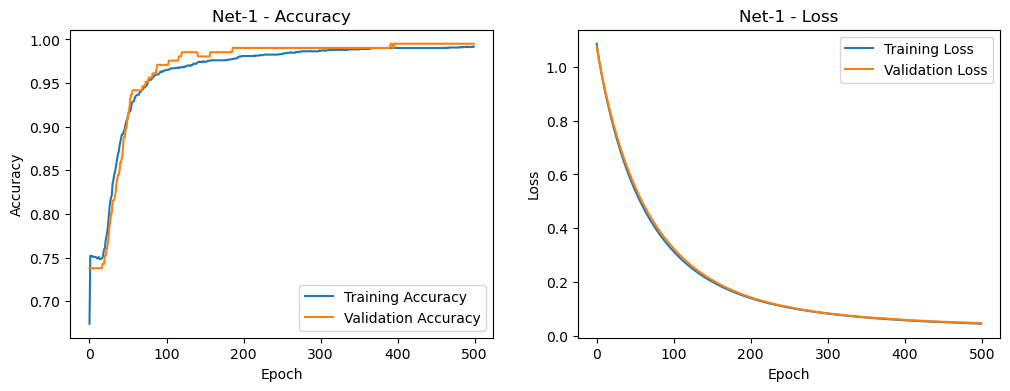

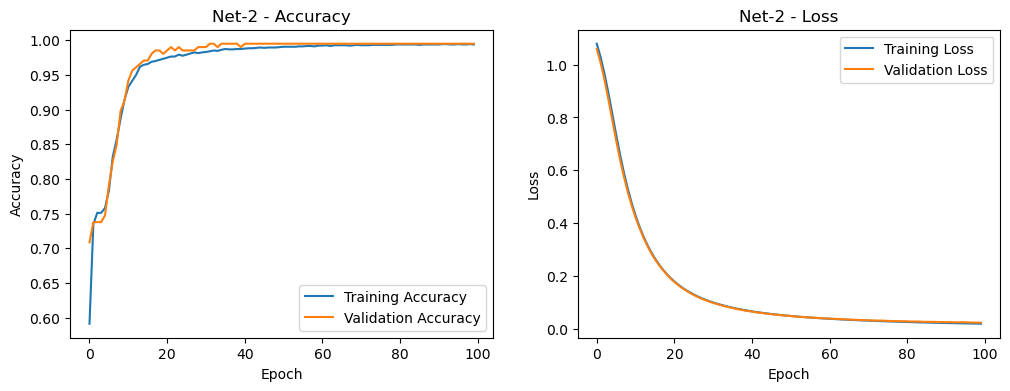

Net-1 Test Accuracy:  0.9897611141204834
Net-2 Test Accuracy:  0.9908987283706665
Logistic Regression Test Accuracy:  0.7599544937428896
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       364
           1       0.85      1.00      0.92       294
           2       1.00      0.05      0.09       221

    accuracy                           0.76       879
   macro avg       0.85      0.68      0.61       879
weighted avg       0.82      0.76      0.67       879

Logistic Regression Test Accuracy:  0.7599544937428896
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       364
           1       0.85      1.00      0.92       294
           2       1.00      0.05      0.09       221

    accuracy                           0.76       879
   macro avg       0.85      0.68      0.61       879
weighte

In [3]:
# Load and preprocess the dataset
def load_data():
    path_0 = 'https://raw.githubusercontent.com/mumer97/Stats/main/digit0'
    path_1 = 'https://raw.githubusercontent.com/mumer97/Stats/main/digit1'
    path_2 = 'https://raw.githubusercontent.com/mumer97/Stats/main/digit2'
    
    df_0 = pd.read_csv(path_0, header=None)
    df_1 = pd.read_csv(path_1, header=None)
    df_2 = pd.read_csv(path_2, header=None)

    X = pd.concat([df_0, df_1, df_2])
    y = np.concatenate([np.zeros(len(df_0)), np.ones(len(df_1)), np.full(len(df_2), 2)])

    X = X.values / 255.0  # Normalize the input data
    return X, y

def preprocess_data(X, y):
    X = X.reshape(-1, 16, 16, 1)  # Reshape the input data to a 16x16 format
    y = tf.keras.utils.to_categorical(y, num_classes=3)  # One-hot encode the labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

X, y = load_data()
X_train, X_test, y_train, y_test = preprocess_data(X, y)

# Create the neural network models for Net-1 and Net-2
def create_net1():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(16, 16, 1)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_net2():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(16, 16, 1)),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Fit the neural network models to the training data

epchs_1 = 500

epchs_2 = 100

net1 = create_net1()
history_net1 = net1.fit(X_train, y_train, epochs= epchs_1, batch_size=32, validation_split=0.1)

net2 = create_net2()
history_net2 = net2.fit(X_train, y_train, epochs= epchs_2, batch_size=32, validation_split=0.1)

# Plot training accuracy and loss for Net-1 and Net-2
def plot_history(history, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title(title + ' - Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title(title + ' - Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

# Plot the training accuracy and loss for Net-1 and Net-2
plot_history(history_net1, 'Net-1')
plot_history(history_net2, 'Net-2')

# Evaluate the neural network models
net1_test_accuracy = net1.evaluate(X_test, y_test, verbose=0)[1]
net2_test_accuracy = net2.evaluate(X_test, y_test, verbose=0)[1]

print("Net-1 Test Accuracy: ", net1_test_accuracy)
print("Net-2 Test Accuracy: ", net2_test_accuracy)

# Logistic Regression
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logistic_regression.fit(X_train.reshape(-1, 256), np.argmax(y_train, axis=1))

y_pred = logistic_regression.predict(X_test.reshape(-1, 256))

print("Logistic Regression Test Accuracy: ", logistic_regression.score(X_test.reshape(-1, 256), np.argmax(y_test, axis=1)))

# Print the classification report
print("Classification report for Logistic Regression:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))

print("Logistic Regression Test Accuracy: ", logistic_regression.score(X_test.reshape(-1, 256), np.argmax(y_test, axis=1)))

# Print the classification report
print("Classification report for Logistic Regression:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))